1. Installing tesorflow and keras and print their versions

In [1]:
! pip install tensorflow

In [2]:
! pip install keras 

In [3]:
import keras
import tensorflow as tf


In [4]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


2. Load the wine quality dataset and explore it's dimension

In [5]:
import pandas as pd
import numpy as np

In [6]:
## Reading the dataset
df=pd.read_csv('./wine.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [8]:
df.shape

(1599, 12)

3. Check for null values, identify categorical variables, and encode them.

In [9]:
## Check for null
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- No null values

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [11]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [12]:
## Encoding the Categorical Features
df['quality']=df['quality'].map({'good':1,'bad':0})

In [13]:
df['quality'].unique()

array([0, 1], dtype=int64)

4. Separate the features and target variables from the dataframe.

In [14]:
X=df.drop(columns=['quality'])
y=df['quality']

5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=21)

In [17]:
X_test.shape,X_train.shape

((320, 11), (1279, 11))

6. Perform scaling on the dataset.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard

In [35]:
## Defining a Model
model=Sequential()

In [22]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
751,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5
370,6.9,0.765,0.02,2.3,0.063,35.0,63.0,0.99750,3.57,0.78,9.9
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
708,7.8,0.545,0.12,2.5,0.068,11.0,35.0,0.99600,3.34,0.61,11.6


In [36]:
model.add(Flatten(input_shape=(11,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [24]:
tensorboard_callback=TensorBoard(log_dir='/logs',histogram_freq=1)

10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.

In [25]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)

11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [26]:
model_checkpoint=ModelCheckpoint(filepath='model.ckpt',save_weights_only=True, verbose=1,save_best_only=True, monitor='val_loss',mode='min')

12. Print the model summary.

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [37]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [38]:
history=model.fit(X_train,y_train,validation_split=0.15,callbacks=[tensorboard_callback,model_checkpoint,early_stopping],epochs=10,verbose=1,shuffle=True,batch_size=20)

Epoch 1/10
30/55 [===============>..............] - ETA: 0s - loss: 1.7275 - accuracy: 0.4500 
Epoch 1: val_loss did not improve from 0.60424
55/55 [==============================] - 1s 8ms/step - loss: 1.2775 - accuracy: 0.5041 - val_loss: 0.6745 - val_accuracy: 0.6250
Epoch 2/10
54/55 [============================>.] - ETA: 0s - loss: 0.6765 - accuracy: 0.6046
Epoch 2: val_loss did not improve from 0.60424
55/55 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.6035 - val_loss: 0.6666 - val_accuracy: 0.6042
Epoch 3/10
50/55 [==========================>...] - ETA: 0s - loss: 0.6478 - accuracy: 0.6170
Epoch 3: val_loss did not improve from 0.60424
55/55 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6256 - val_loss: 0.6627 - val_accuracy: 0.5833
Epoch 4/10
30/55 [===============>..............] - ETA: 0s - loss: 0.6309 - accuracy: 0.6300
Epoch 4: val_loss did not improve from 0.60424
55/55 [==============================] - 0s 3ms/

16. Get the model's parameters.

In [40]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 55}

17. Store the model's training history as a Pandas DataFrame.

In [41]:
df=pd.DataFrame(history.history)

In [42]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.277530,0.504140,0.674499,0.625000
1,0.677540,0.603496,0.666577,0.604167
2,0.644053,0.625575,0.662736,0.583333
3,0.655862,0.621895,0.655956,0.614583
4,0.645539,0.637534,0.652204,0.604167


18. Plot the model's training history.

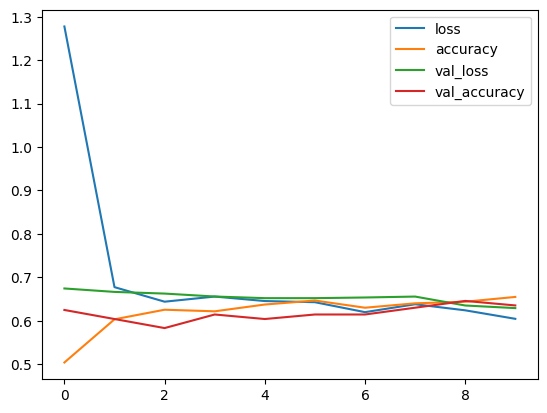

In [46]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

19. Evaluate the model's performance using the test data.

In [47]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6594


[0.6084685921669006, 0.659375011920929]

Loading the best weights and Evaluating it.

In [48]:
model.load_weights('model.ckpt')

In [49]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.6938


[0.5927370190620422, 0.6937500238418579]